In [1]:
import sys
sys.path.append('../src')
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from instance import Instance
from utils import sweep_groups, sort_group_by_subst_dist, prim

In [2]:
I = Instance(
    instance_dir='../data/raw',
    instance='n50_s01_t01_w01'
)

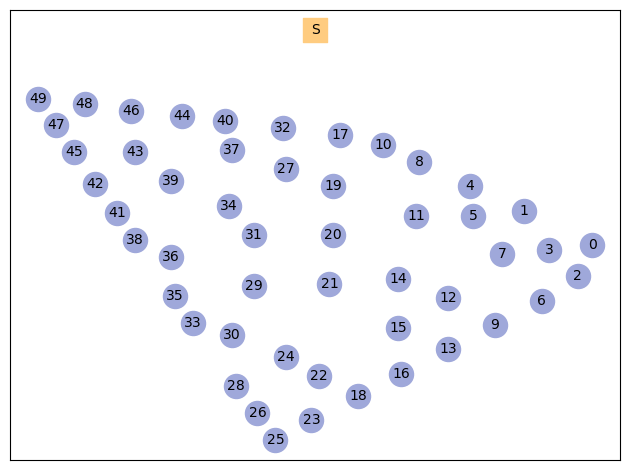

In [3]:
G = nx.DiGraph()
G.add_node('S', pos=(0, 0))
for i in range(len(I.turbs)):
    G.add_node(i, pos=I.turbs[i])
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx_nodes(G, pos,
                       nodelist=['S'],
                       node_color='#FFCC80',
                       node_shape='s')
nx.draw_networkx_nodes(G, pos,
                       nodelist=range(len(I.turbs)),
                       node_color='#9FA8DA')
nx.draw_networkx_labels(G, pos,
                        font_size=10)
plt.tight_layout()
plt.show()

In [4]:
groups = sweep_groups(len(I.turbs),
                      starting_index=8,
                      clockwise=True,
                      tpg = len(I.turbs)//I.C + 1)
for group in groups:
    print(group)

[0, 1, 2]
[3, 4, 5, 6, 7]
[8, 9, 10, 11, 12, 13, 14, 15, 16]
[17, 18, 19, 20, 21, 22, 23, 24, 25]
[26, 27, 28, 29, 30, 31, 32, 33, 34]
[35, 36, 37, 38, 39, 40, 41, 42, 43]
[44, 45, 46, 47, 48, 49]


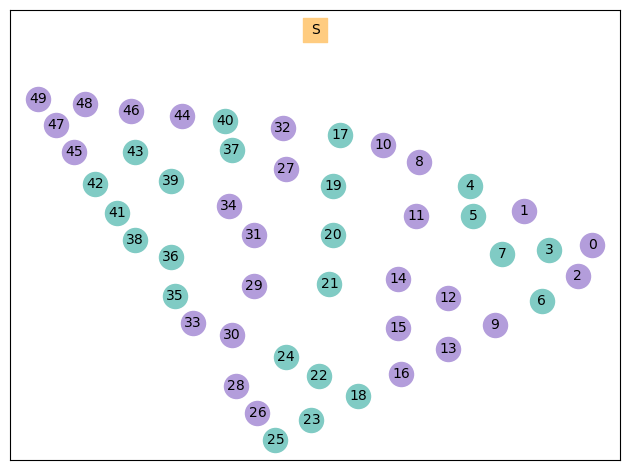

In [5]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=['S'],
                       node_color='#FFCC80',
                       node_shape='s')
color = ['#B39DDB', '#80CBC4']
for i in range(len(groups)):
    nx.draw_networkx_nodes(G, pos,
                           nodelist=groups[i],
                           node_color=color[i%2])
nx.draw_networkx_labels(G, pos,
                        font_size=10)
plt.tight_layout()
plt.show()

In [6]:
ord_groups = [sort_group_by_subst_dist(group, I.dist) for group in groups]
for group in ord_groups:
    print(group)

[1, 0, 2]
[4, 5, 7, 3, 6]
[10, 8, 11, 14, 12, 15, 9, 13, 16]
[17, 19, 20, 21, 24, 22, 18, 23, 25]
[32, 27, 34, 31, 29, 33, 30, 28, 26]
[40, 37, 43, 39, 42, 41, 38, 36, 35]
[44, 46, 48, 47, 49, 45]


In [7]:
edges_group = [prim(group, I.dist, group[0]) for group in ord_groups]
for edges in edges_group:
    print(edges)

[[0, 1], [2, 0]]
[[5, 4], [7, 5], [3, 7], [6, 3]]
[[8, 10], [11, 8], [14, 11], [12, 14], [9, 12], [13, 9], [16, 13], [15, 13]]
[[19, 17], [20, 19], [21, 20], [24, 21], [22, 24], [18, 22], [23, 18], [25, 23]]
[[27, 32], [34, 27], [31, 34], [29, 31], [30, 29], [33, 30], [28, 30], [26, 28]]
[[37, 40], [39, 37], [43, 39], [42, 43], [41, 42], [38, 41], [36, 38], [35, 36]]
[[46, 44], [48, 46], [47, 48], [45, 47], [49, 47]]


/tmp/ipykernel_40904/2181871784.py:13: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[[group[0], 'S']])


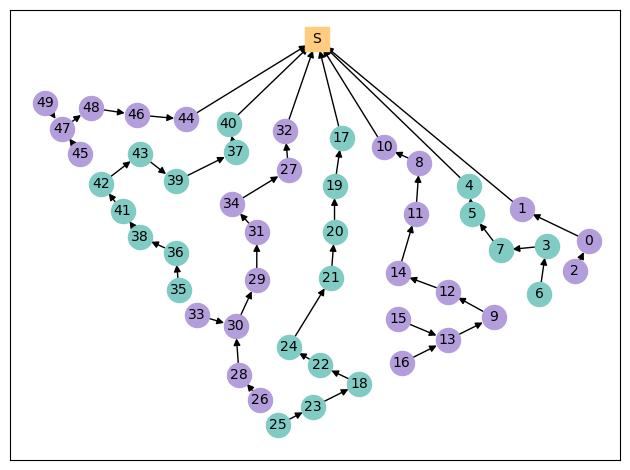

In [8]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=['S'],
                       node_color='#FFCC80',
                       node_shape='s')
color = ['#B39DDB', '#80CBC4']
for i in range(len(groups)):
    nx.draw_networkx_nodes(G, pos,
                           nodelist=groups[i],
                           node_color=color[i%2])
for edges in edges_group:
    nx.draw_networkx_edges(G, pos, edgelist=edges)
for group in ord_groups:
    nx.draw_networkx_edges(G, pos, edgelist=[[group[0], 'S']])
nx.draw_networkx_labels(G, pos,
                        font_size=10)
plt.tight_layout()
plt.show()